We will be using a decision tree to make predictions about the Titanic data
set from Kaggle. This data set provides information on the Titanic
passengers and can be used to predict whether a passenger survived or
not.

You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
(Parents/children aboard), and Fare to predict whether a passenger
survived.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
Url="https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(Url)

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

As we use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
(Parents/children aboard), and Fare to predict whether a passenger
survived. so delete other column

In [5]:
titanic.drop(['PassengerId', 'Name','Ticket', 'Cabin'], axis=1, inplace=True)

In [6]:
titanic.drop(['Embarked'], axis=1, inplace=True)

In [7]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [8]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

we can see age column have 177 missing value. lets fill it with mean

In [9]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [10]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [11]:
X = titanic.drop(['Survived'], axis=1)

In [12]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.000000,1,0,7.2500
1,1,female,38.000000,1,0,71.2833
2,3,female,26.000000,0,0,7.9250
3,1,female,35.000000,1,0,53.1000
4,3,male,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000
887,1,female,19.000000,0,0,30.0000
888,3,female,29.699118,1,2,23.4500
889,1,male,26.000000,0,0,30.0000


In [13]:
y = titanic['Survived']

In [14]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [15]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


As we can see SEX col have categorcal variable

In [16]:
X['Sex'] = X['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [17]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [18]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=101, random_state=101)

In [19]:
#make our first model with default param
dt = DecisionTreeClassifier(random_state=101)

In [20]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

In [21]:
y_predict = dt.predict(X_test)

In [22]:
print(metrics.accuracy_score(y_test, y_predict))

0.8118811881188119


In [23]:
print(metrics.confusion_matrix(y_test, y_predict))

[[51  5]
 [14 31]]


In [24]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        56
           1       0.86      0.69      0.77        45

    accuracy                           0.81       101
   macro avg       0.82      0.80      0.80       101
weighted avg       0.82      0.81      0.81       101



In [25]:
# looks fine. let do some hyperparameter tuning 
from sklearn.model_selection import KFold, GridSearchCV

In [26]:
fold = KFold(n_splits=10, shuffle=True, random_state=101)

In [29]:
param_grid = {'criterion':['gini','entropy'],  'splitter':['best','random'],
              'max_depth': range(10,100),'min_samples_split':[2,3,4,5],'min_samples_leaf':[1,2,3,4,5]} 

In [30]:
gridSearch = GridSearchCV(estimator=dt, param_grid=param_grid, cv=fold, verbose=3, return_train_score=True, n_jobs=-1)

In [31]:
gridSearch.fit(X_train, y_train)

Fitting 10 folds for each of 7200 candidates, totalling 72000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 1680 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 3472 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 5776 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 8592 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 11920 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 15760 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 20112 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 24976 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 30352 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 36240 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 42640 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 49552 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 56976 ta

GridSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=101), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 100),
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             return_train_score=True, verbose=3)

In [32]:
gridSearch.best_score_

0.8177215189873419

In [33]:
gridSearch.best_params_

{'criterion': 'entropy',
 'max_depth': 17,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'splitter': 'random'}

In [34]:
# ler visualise result
result = pd.DataFrame(gridSearch.cv_results_)

In [35]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.012432,0.002959,0.003682,0.002338,gini,10,1,2,best,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",...,0.926864,0.945148,0.925457,0.936709,0.924051,0.929677,0.931083,0.924051,0.930098,0.006354
1,0.010451,0.003772,0.006326,0.004930,gini,10,1,2,random,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",...,0.890295,0.895921,0.886076,0.883263,0.890295,0.908579,0.887482,0.888889,0.893671,0.008084
2,0.012233,0.003553,0.005202,0.001393,gini,10,1,3,best,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",...,0.918425,0.936709,0.917018,0.931083,0.917018,0.918425,0.924051,0.914205,0.921378,0.006903
3,0.009933,0.002583,0.005252,0.002219,gini,10,1,3,random,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",...,0.905767,0.870605,0.883263,0.876231,0.880450,0.874824,0.901547,0.887482,0.886639,0.011096
4,0.010598,0.001671,0.004787,0.002005,gini,10,1,4,best,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",...,0.914205,0.926864,0.914205,0.925457,0.909986,0.915612,0.919831,0.914205,0.916878,0.005204


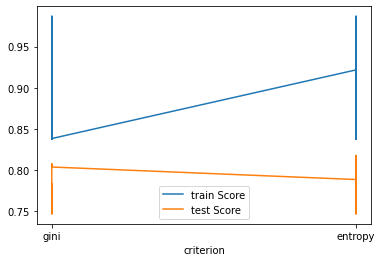

In [36]:
plt.figure()
plt.plot(result['param_criterion'], result['mean_train_score'], label='train Score')
plt.xlabel('criterion')
plt.plot(result['param_criterion'], result['mean_test_score'], label='test Score')
plt.legend()

In [37]:
def comapreTrain_testScorePlot(data, parm_grid):
    
    param = 'param_'
    plotno = 1
    plt.figure(figsize=(25,20), facecolor='white')
    for i in parm_grid:
        param = param+i
        plt.subplot(5,2,plotno)
        plt.plot(data[param], data['mean_train_score'], label='train Score')
        plt.plot(data[param], data['mean_test_score'], label='test Score')
        plt.xlabel(param)
        plt.ylabel("Score")
        plt.legend()
        plotno +=1
        param = 'param_'
        plt.tight_layout()

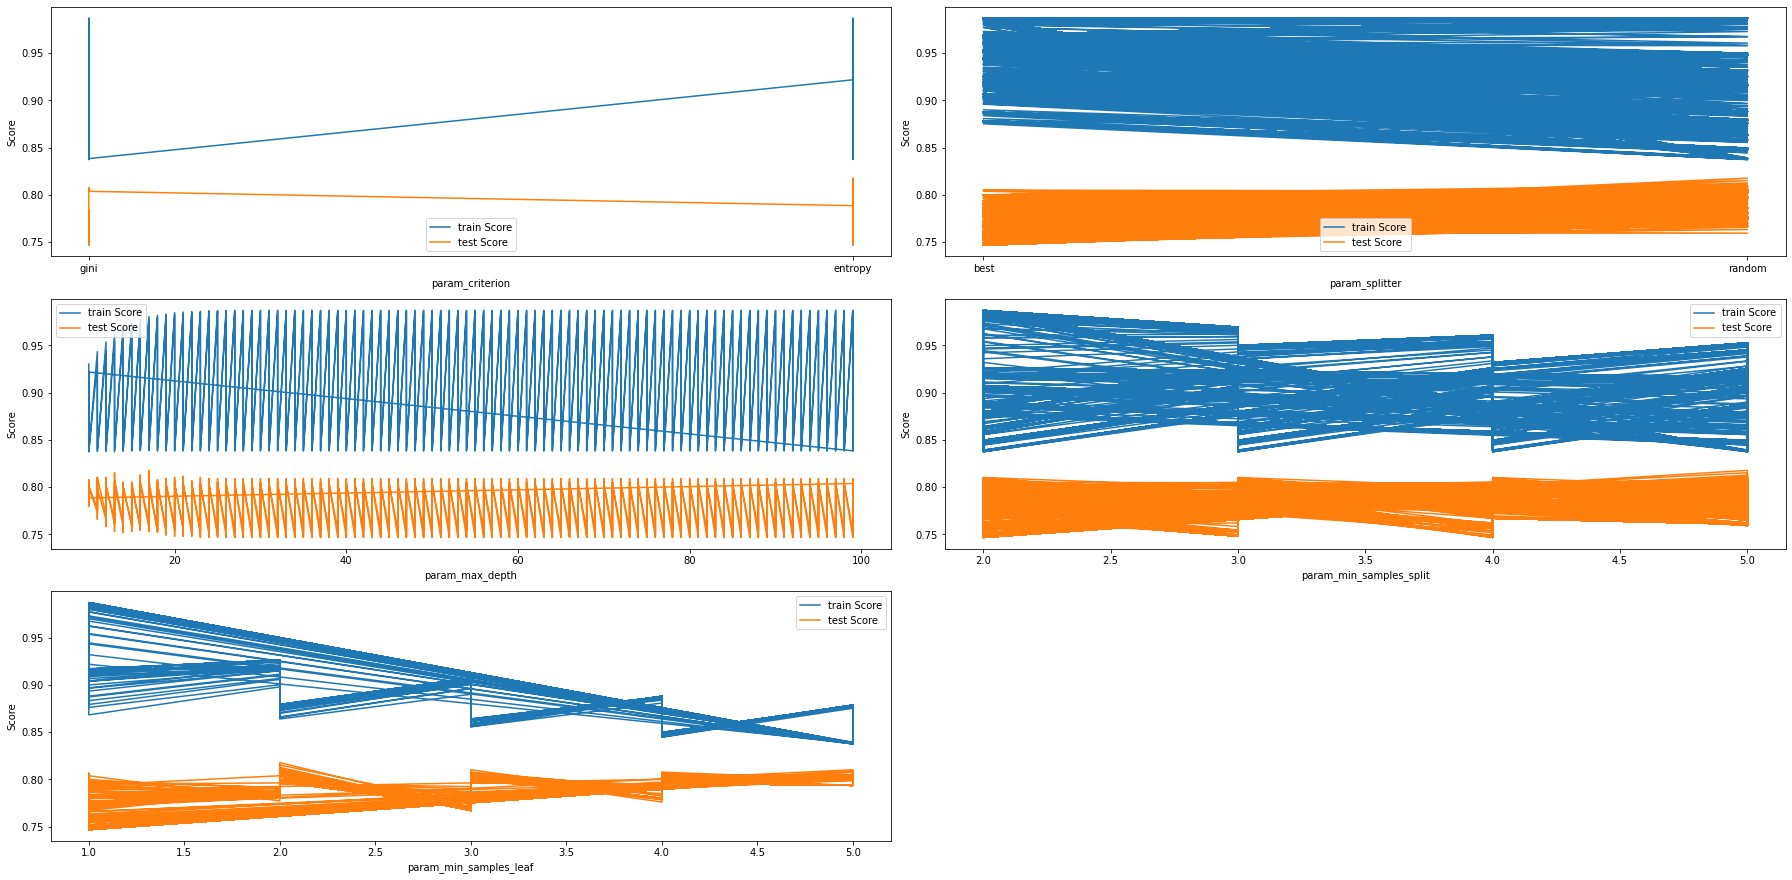

In [38]:
# let visualise for all hyperParam
comapreTrain_testScorePlot(result, param_grid)

we can see model performance on train and test score

In [140]:
# let bulid our model using best param

In [39]:
gridSearch.best_params_

{'criterion': 'entropy',
 'max_depth': 17,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'splitter': 'random'}

In [40]:
dt_hyper = DecisionTreeClassifier(criterion='entropy', max_depth=17, min_samples_leaf=2,
                                  min_samples_split=5, splitter='random', random_state=101)

In [41]:
dt_hyper.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=17, min_samples_leaf=2,
                       min_samples_split=5, random_state=101,
                       splitter='random')

In [42]:
y_predict = dt_hyper.predict(X_test)

In [43]:
print(metrics.accuracy_score(y_test, y_predict))

0.8118811881188119


In [44]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85        56
           1       0.91      0.64      0.75        45

    accuracy                           0.81       101
   macro avg       0.84      0.80      0.80       101
weighted avg       0.83      0.81      0.81       101



In [45]:
print(metrics.f1_score(y_test, y_predict))

0.7532467532467533
